In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import netCDF4 as nc
%matplotlib inline
plt.rcParams['text.usetex'] = False
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
plt.rcParams['font.family'] = 'Dejavu Serif'

In [2]:
# constants
secondsPerDay = 86400
nx = 500
ny = 500

# plotting params
deepIndex = 35
yRange = np.linspace(-ny,ny,ny)
yRMeters = yRange*1000

# io params
loc = f"/scratch/hcm7920/ambData/levelMean/"
conc = ["0", "20", "40", "60", "80", "100"]
saveloc = "/home/hcm7920/experiments/arcticMiddepthBI/plots/"                                       

In [3]:
# load data

levs = np.load(loc+"../grid/gridLevs.npy")

timeDiags = np.load(loc+"../grid/gridTimeDiags.npy")
keLevMax = np.load(loc+"levelMaxKE.npy")
keLevMean = np.load(loc+"levelMeanKE.npy")

channelMeanU  = np.load(loc+"../channelMean/channelMeanU.npy")
channelMeanV  = np.load(loc+"../channelMean/channelMeanV.npy")
channelMeanKE = np.load(loc+"../channelMean/channelMeanKE.npy")


In [4]:
# calculate EKE and MKE

mKE = 0.5*(channelMeanU**2 + 0.5*(channelMeanV[:,1:,:]+channelMeanV[:,:-1,:])**2)
eKE = channelMeanKE - mKE


Text(0.5, 0, 'Across channel distance (km)')

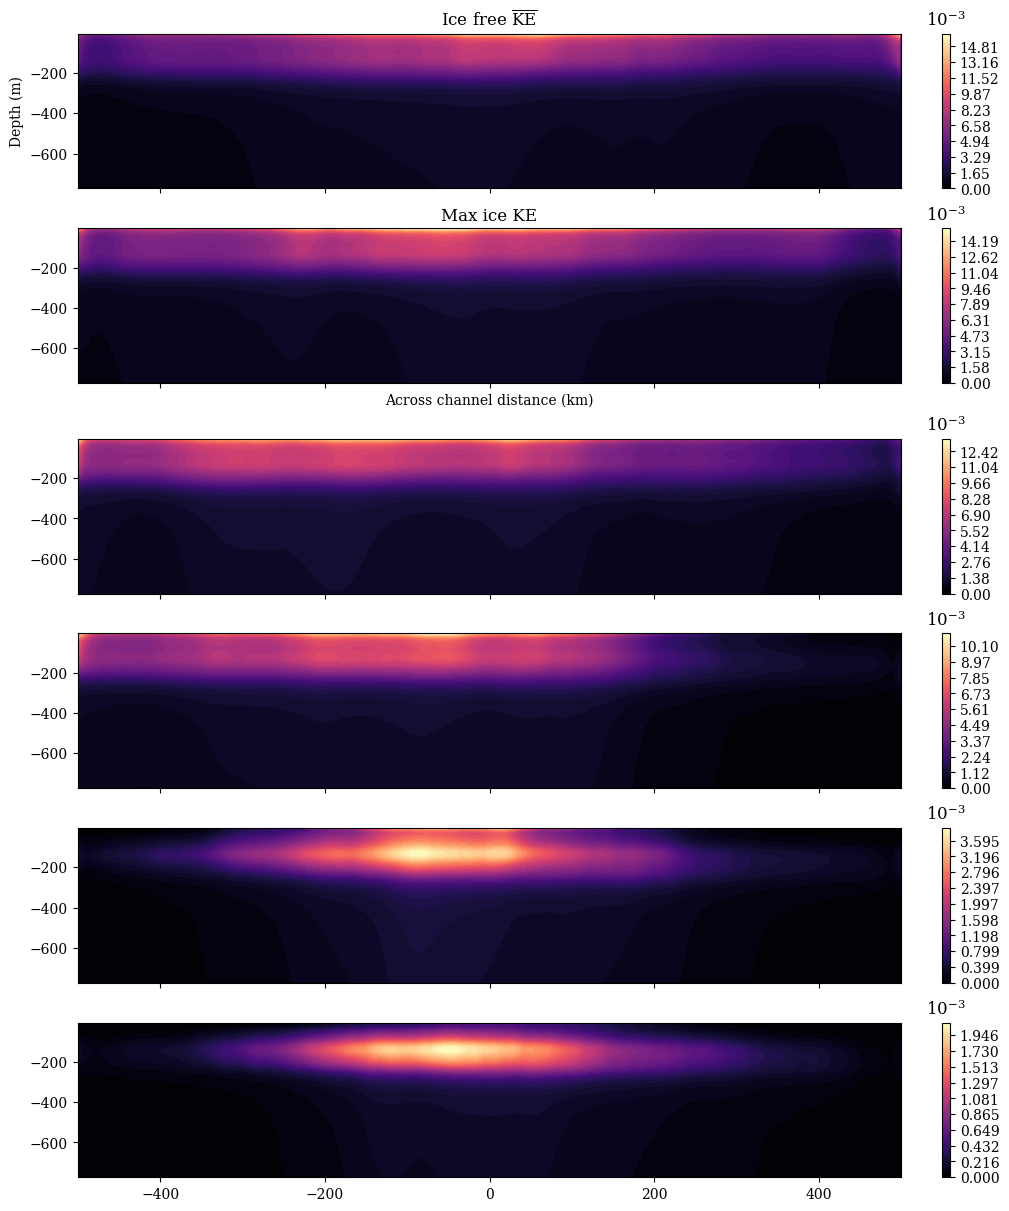

In [5]:
# make example plots

fig,ax = plt.subplots(len(conc),1,sharex=True,
                     figsize=(10,12),
                     layout='constrained')
for ic in range(len(conc)):
  
  myMax = channelMeanKE[:,:,ic].max()*1000
  contourLevels = np.linspace(0,myMax,50)
  im = ax[ic].contourf(yRange, levs[:deepIndex],
                      channelMeanKE[:deepIndex,:,ic]*1000,
                      contourLevels, cmap='magma')
  cbar = plt.colorbar(im, ax=ax[ic])
  cbar.ax.set_title("$10^{-3}$")
  ax[0].set_ylabel("Depth (m)")
  
  
ax[0].set_title("Ice free $\overline{\mathrm{KE}}$")
ax[1].set_title("Max ice KE")
ax[1].set_xlabel("Across channel distance (km)")



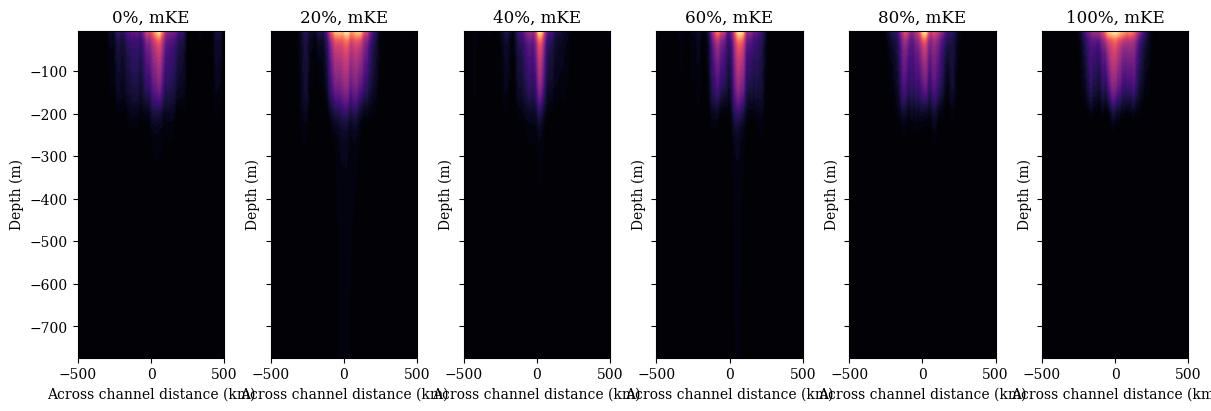

In [6]:
# make example plots

fig,ax = plt.subplots(1,len(conc),sharey=True,
                     figsize=(12,4),
                     layout='constrained')

for ic in range(len(conc)):
  
  myMax = mKE[:,:,ic].max()
  contourLevels = np.linspace(0,myMax,50)
  im = ax[ic].contourf(yRange, levs[:deepIndex],
                      mKE[:deepIndex,:,ic],
                      contourLevels, cmap='magma')
  ax[ic].set_xlabel("Across channel distance (km)")
  ax[ic].set_ylabel("Depth (m)")
  ax[ic].set_title(f"{conc[ic]}%, mKE")



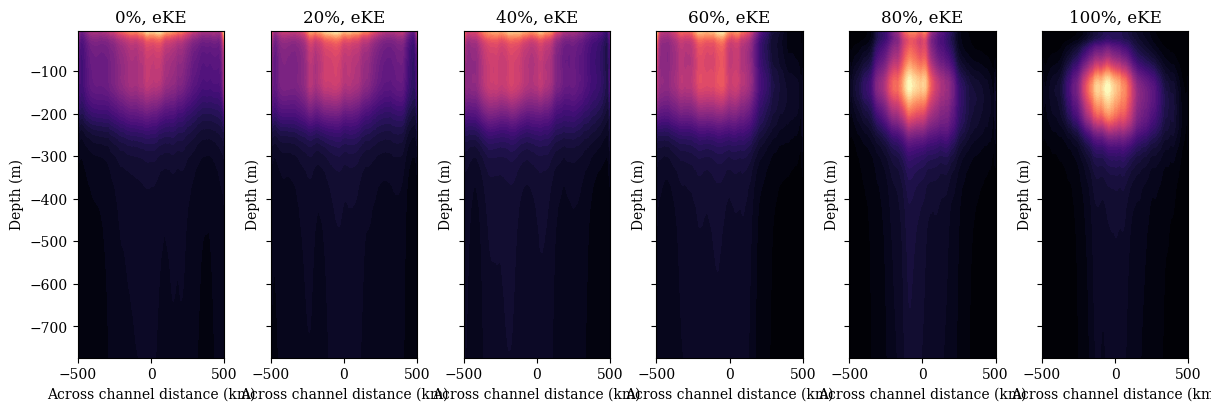

In [7]:
# make example plots

fig,ax = plt.subplots(1,len(conc),sharey=True,
                     figsize=(12,4),
                     layout='constrained')

for ic in range(len(conc)):
  
  myMax = eKE[:,:,ic].max()
  contourLevels = np.linspace(0,myMax,50)
  im = ax[ic].contourf(yRange, levs[:deepIndex],
                      eKE[:deepIndex,:,ic],
                      contourLevels, cmap='magma')
  ax[ic].set_xlabel("Across channel distance (km)")
  ax[ic].set_ylabel("Depth (m)")
  ax[ic].set_title(f"{conc[ic]}%, eKE")



Text(0.5, 1.0, 'Ice covered')

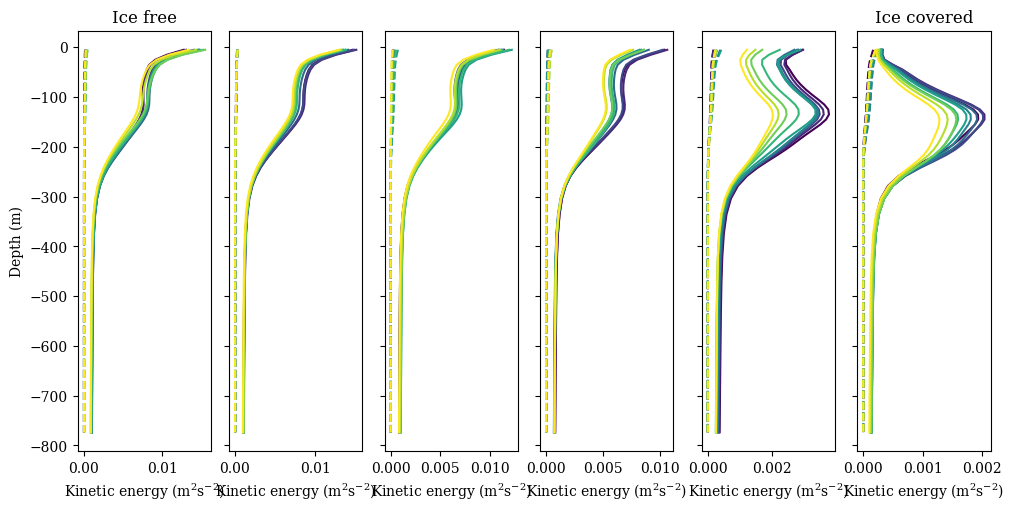

In [8]:
# profiles of KE, EKE, and MKE, testing for location

deepIndex = 35
pLocs = np.arange(210,310,10)
colors = plt.cm.viridis(np.linspace(0,1,10))
fig, ax = plt.subplots(1,len(conc),sharey=True,
                      layout='constrained',
                      figsize=(10,5))

for ic in range(len(conc)):
  for ip in range(10):
    ax[ic].plot(eKE[:deepIndex,pLocs[ip],ic],
               levs[:deepIndex],
               color=colors[ip],
               linestyle='solid',
               label=f'Eddy KE {ip+1}')
    ax[ic].plot(mKE[:deepIndex,pLocs[ip],ic],
               levs[:deepIndex],
               color=colors[ip],
               linestyle='dashed',
               label=f'Mean KE {ip+1}')
  lbl1 = "Kinetic energy ($\mathrm{m}^2\mathrm{s}^{-2}$)"
  ax[ic].set_xlabel(lbl1)

ax[0].set_ylabel("Depth (m)")
ax[0].set_title("Ice free")
ax[-1].set_title("Ice covered")


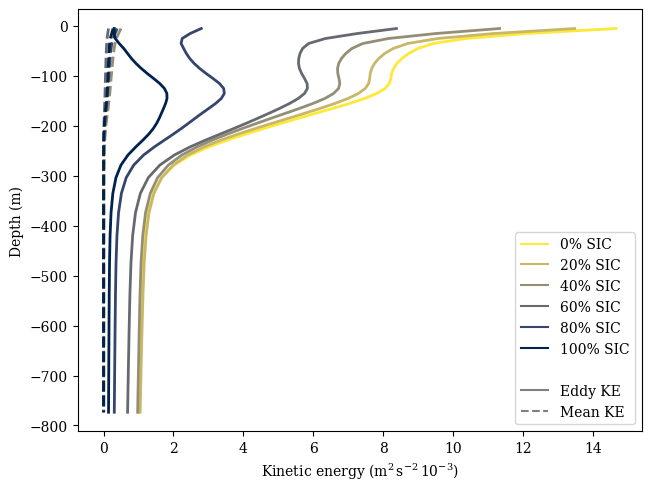

In [9]:
# profiles of mKE & eKE, official

deepIndex = 35
colors = plt.cm.cividis_r(np.linspace(0,1,len(conc)))
lbl = ["0%", "20%", "40%", "60%", "80%", "100%"]
plt.figure(layout="constrained")

for ic in range(len(conc)):
  plt.plot((eKE[:deepIndex,250,ic]*1e3),
          levs[:deepIndex],
          color=colors[ic],
          linestyle='solid',
          linewidth=2)
  plt.plot((mKE[:deepIndex,250,ic]*1e3),
          levs[:deepIndex],
          color=colors[ic],
          linestyle='dashed',
          linewidth=2)

unitLbl = "($\mathrm{m}^2\,\mathrm{s}^{-2}\,10^{-3}$)"
plt.xlabel("Kinetic energy "+unitLbl)
plt.ylabel("Depth (m)")
legend_elements = []
for ic in range(len(conc)):
  holder = Line2D([0], [0], color=colors[ic], label=f"{lbl[ic]} SIC")
  legend_elements.append(holder)
legend_elements.append(Line2D([0],[0],color="white",label=""))
legend_elements.append(Line2D([0],[0],color="gray",label="Eddy KE"))
legend_elements.append(Line2D([0],[0],color="gray",
                              linestyle="dashed",label="Mean KE"))
plt.legend(handles=legend_elements)

plt.savefig(saveloc+"officialFigs/figEddyKEProfile.pdf",bbox_inches="tight")
  
# see fig 1b, manucharyan stewart 2022
  

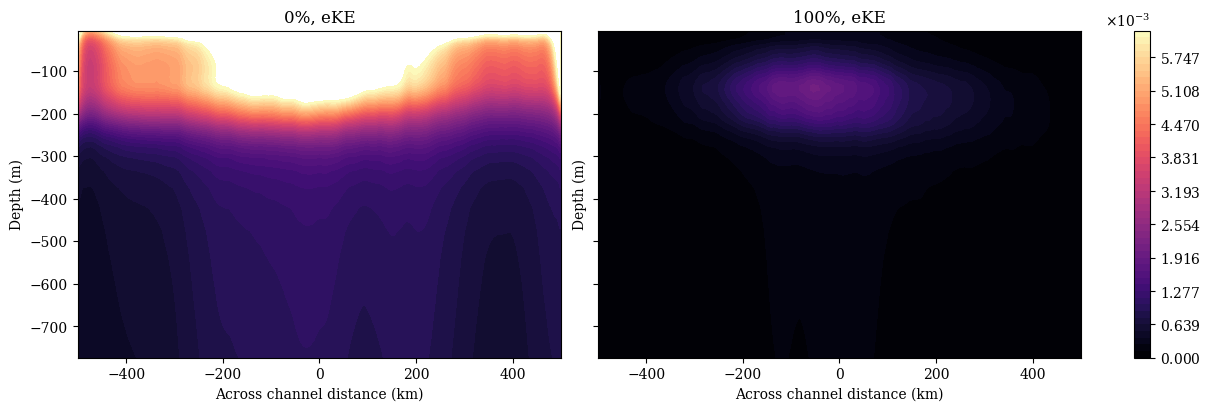

In [10]:

fig,ax = plt.subplots(1,2,sharey=True,
                     figsize=(12,4),
                     layout='constrained')

myMax = eKE[:,:,0].max() * 0.4
contourLevels = np.linspace(0,myMax,50)
im1 = ax[0].contourf(yRange, levs[:deepIndex],
                    eKE[:deepIndex,:,0],
                    contourLevels, cmap='magma')
ax[0].set_xlabel("Across channel distance (km)")
ax[0].set_ylabel("Depth (m)")
ax[0].set_title(f"{conc[0]}%, eKE")

im2 = ax[1].contourf(yRange, levs[:deepIndex],
                    eKE[:deepIndex,:,-1],
                    contourLevels, cmap='magma')
ax[1].set_xlabel("Across channel distance (km)")
ax[1].set_ylabel("Depth (m)")
ax[1].set_title(f"{conc[-1]}%, eKE")
cbar = plt.colorbar(im1, ax=ax[1])
cbar.formatter.set_powerlimits((-3,-3))
cbar.formatter.set_useMathText(True)

